<a href="https://colab.research.google.com/github/ashwin-r-k/Computational-Physics_3labs/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 

# Group 3:


---

Ashwin Kharat



In [ ]:
#-- This will reseted the runtime and  clear all variable.
%reset -f
#A new Begining
#-- importing all the necessary Libraries
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import scipy.optimize
from scipy.integrate import solve_ivp
## --


#-- Custome functions to make life easy.
# g3 represent Group 3
# g3_lable class creates a lable object which can be used with newPlot and multiPlot functions
# g3_lable format is 
#1.  Legend of the plot that u want to make   ) 
#2. X axis lable ,  3. Y axis lable
#3 style of line ploted 
# this can all be skiped and a defalt plot is made with defalt lable  

#newPlot makes a fresh new Figure and plot taking the g3_lable 
#formate is (x values , y values , g3_lable object )

# multiPlot can be used repeteadly to plot on same figure.
#formate is (x values , y values , g3_lable object ).

# New class to make labling easy and code smaller and reusable.
class g3_label():
  def __init__(self, ll = None ,lx = 'x',ly ='y',style = '-'):
    self.ll = ll    # the lable for legend
    self.lx = lx    # x axis
    self.ly = ly    # y axis
    self.style = style
 
class g3:
    
  def newPlot(x, y, L = g3_label() ):
    fig = plt.figure()
    easy = fig.add_subplot(111)  
    easy.plot( x, y,  L.style, label = L.ll )
    easy.legend()
    plt.xlabel( L.lx )
    plt.ylabel( L.ly )
 
  def multiPlot(x, y, L = g3_label() ):
    plt.plot( x, y, L.style, label = L.ll ,alpha=0.5)
    plt.legend()
    plt.xlabel( L.lx )
    plt.ylabel( L.ly )
#--



# Note :
Indentation spacing used is 4.[As we worked on jupyter when net was not working] 
so if their indentation error pleas chnage setting

#QM Lab - 1

## Problem 1. Giordano & Nakanishi 2nd ed. Based on Problem 10.1


Use the shooting method to obtain the lowest six energy levels for an infinite square well, and their corresponding normalized wavefunctions. Take the box to have walls at $x = \pm 1$ . This will require a program that can deal with even-parity and odd-parity solutions.

a. Examine how the energy varies with the quantum number $n$ .

b. Compare the wavefunctions with the exact solutions.

c. How does the ground-state energy vary with the choice of step-size $Δx$ . Try $Δx = 0.05, 0.01, 0.005 $

d. [Important]: Modify your program to solve for the ground and first excited states for a nucleon in a box (finite potential well) with V (x) given by $ V(x) = V0 = 83MeV$ for $|x| ≤2fm $,and zero otherwise. What are the corresponding energy eigenvalues (in $MeV$)? How many eigenstates does this finite potential well have?

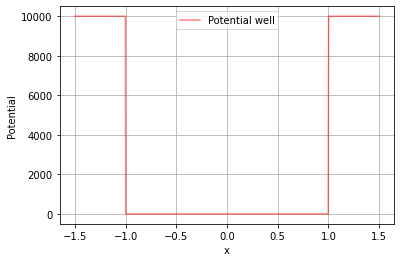

In [ ]:
# Box Is defined Here.

#Half length of box from center[ x,y,z = Zero] to one edge.
L = 1 #Meters.
dx = 0.001 # meters
x_range = np.linspace(-1.5*L,+1.5*L, int(L/dx) );
# x_range is only used for ploting the box animination.
#it can also be used for psi calculation but i would not.
# int(L/dx) is resolution of the calculation for well.
      
# to handle arrays and numbers also.
#we can use float('inf') to represent infinity but we are just using a very big number to represnt well.

def Potential(x):
    try:
        y = np.zeros(len(x))  
    except:
        if (abs(x) < L ):
            return (0.0)
        else:
            return (1000)
    else:
        y = np.zeros(len(x))
        for i in range(len(x) ):    
            if (abs(x[i]) < L ):
                #potential inside the box
                y[i] = 0.0
            else:
                #potential outside the box
                y[i] = 10000
        return y        


Label = g3_label(ll = 'Potential well' , lx = 'x' , ly= 'Potential' ,style = 'r-')
g3.multiPlot(x_range,Potential(x_range),Label)


plt.grid()
plt.show()

In [ ]:
def WaveFunction(x_range,Energy,parity):
    
    #psi_m1 ,psi_0 = psi_init #initial conditions
    #not using this ^^ 

    dx = abs(x_range[1]-x_range[0])
    psi = np.zeros( len(x_range)+1)
    
    if (parity =='even'):
        psi[0] = 1 
        psi[1] = 1
    elif(parity == 'odd'):
        psi[0] = -dx 
        psi[1] = 0
    else: 
        raise Exception("provied Parity , it should be 'even' or 'odd'")
        
    for i in range( 2 , len(x_range)+1):
        psi[i] = 2.0*psi[i - 1] - psi[i - 2] - 2.0 * (Energy - Potential( x_range[i - 1] )) * psi[i - 1] * dx**2

    if abs(psi[-1]) > 2:
        #we dont want code to continue if divergent.
        return 'Divergent'

    #deleting the extra minus x = -dx position element.     
    psi = np.delete(psi , 0) #removing the -1 element
    return psi


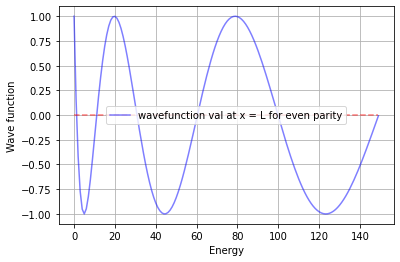

Use the estimate from the intersection of zero line and curve.


In [ ]:
dx = 0.001
L = 1
x = np.arange(0, L+dx ,dx)
parity = 'even' # repeat for 'even' and 'odd'

# to get a better try value for assuming energy.

def lastVal(Energy):
    solve = WaveFunction(x,Energy,parity)    
    return solve[-1]

tryEnergyRange = np.arange(0,150,1)
tryEnergieAtRoot =np.zeros(len(tryEnergyRange))

for i in range(len(tryEnergyRange)):
    tryEnergieAtRoot[i] = lastVal(tryEnergyRange[i])

Label = g3_label(ll = 'wavefunction val at x = L for {0} parity'.format(parity) , lx = 'Energy' , ly= 'Wave function' ,style = 'b-')
g3.multiPlot(tryEnergyRange,tryEnergieAtRoot,Label)
Label = g3_label(ll = '' , lx = 'Energy' , ly= 'Wave function' ,style = 'r--')
g3.multiPlot([0,tryEnergyRange[-1]],[0,0],Label)
plt.grid()
plt.show()

print('Use the estimate from the intersection of zero line and curve.')


In [ ]:
assume_E_odd = [5,20,43,79]
assume_E_even = [3,13,30,60,100,150]

In [ ]:
#few lowest energy levels.

roots_odd = []
roots_even = []

parity ='odd'
for i in assume_E_odd:
    root = scipy.optimize.newton(lastVal,i)
    roots_odd.append(root)
    print("Energy for {0} parity  = {1}".format(parity, round(root,4)))

parity = 'even'
for i in assume_E_even:
    root = scipy.optimize.newton(lastVal,i)
    roots_even.append(root)
    print("Energy for {0} parity  = {1}".format(parity,round(root,4)))

Energy for odd parity  = 4.9348
Energy for odd parity  = 19.7392
Energy for odd parity  = 44.4131
Energy for odd parity  = 78.9561
Energy for even parity  = 1.2325
Energy for even parity  = 11.0922
Energy for even parity  = 30.8117
Energy for even parity  = 60.3906
Energy for even parity  = 99.8286
Energy for even parity  = 149.1255


In [ ]:
print("exact Energies for the first 4 odd levels are :",roots_odd)
print("exact Energies for the first 4 Even levels are :",roots_even)

exact Energies for the first 4 odd levels are : [4.934817841636207, 19.739222661310407, 44.413068343773666, 78.95611136523041]
exact Energies for the first 4 Even levels are : [1.2324724386647805, 11.09223371999038, 30.81165906685484, 60.39055404865142, 99.82862702186453, 149.12548913294623]


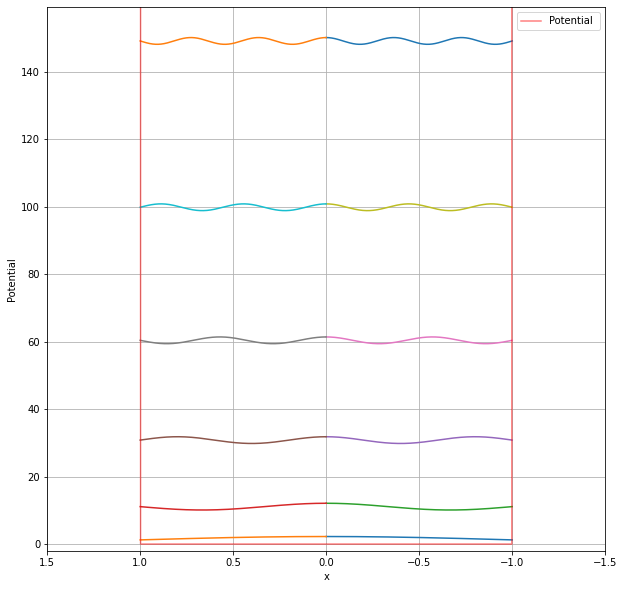

In [ ]:
Energys = roots_even
parity = 'even' # repeat for 'even' and 'odd'

plt.figure(figsize=(10,10))
plt.grid()
L = 1  
dx = 0.001

for Energy in Energys:
    
    xi = np.arange(0, L+dx ,dx)
    psi_sol = WaveFunction(xi,Energy,parity)
    plt.plot(-xi,psi_sol+Energy)
    plt.plot(xi,psi_sol+Energy,)
    

x_range = np.linspace(-L,L, int(L/dx) );
Label = g3_label(ll = 'Potential ' , lx = 'x' , ly= 'Potential' ,style = 'r-')
g3.multiPlot(x_range,Potential(x_range),Label)
plt.ylim(bottom = -2, top = max(Energys)+10)
plt.xlim(right = -(L+0.5), left = (L+0.5))

plt.show()

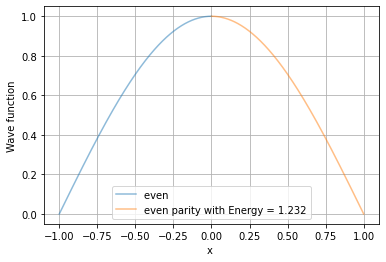

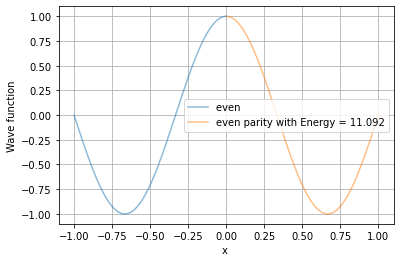

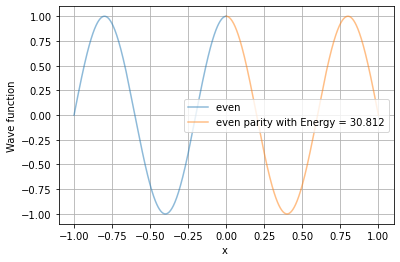

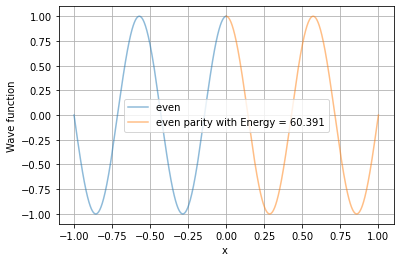

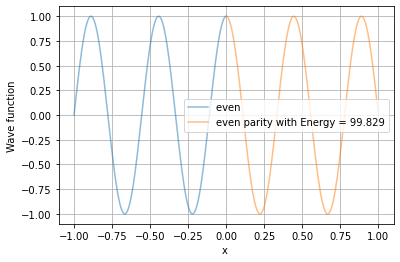

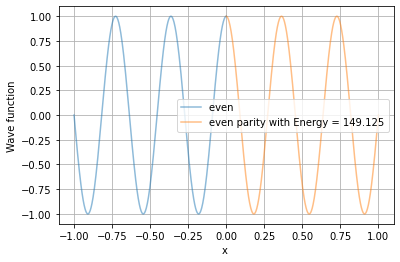

In [ ]:
#Plot even energy levels
# repeat for 'even' and 'odd'
parity = 'even'
for Energy in roots_even:
    

    solve = WaveFunction(x,Energy,parity)
    Label = g3_label(ll = 'even ', lx = 'x ' , ly= 'Wave function' ,style = '-')
    g3.multiPlot(-x,solve,Label)
    Label = g3_label(ll = '{0} parity with Energy = {1}'.format(parity,round(Energy,3)) , lx = 'x ' , ly= 'Wave function' ,style = '-')
    g3.multiPlot(x,solve,Label)

    plt.grid()
    plt.show()



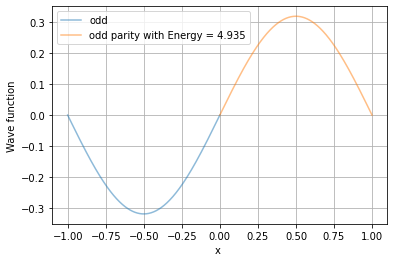

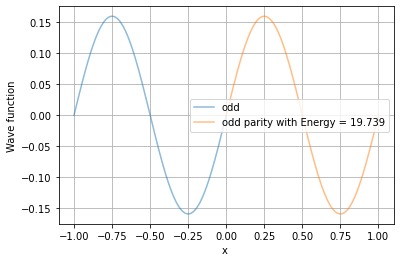

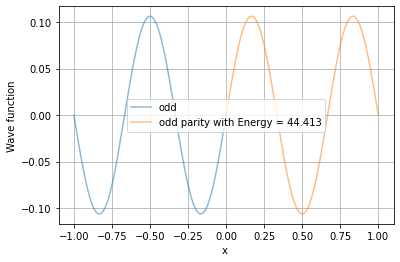

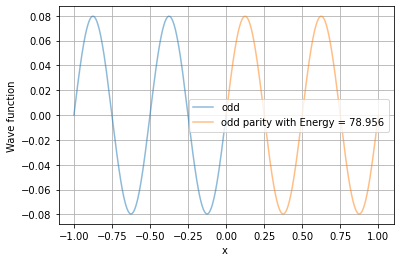

In [ ]:
#plot Odd Energy levels
parity = 'odd'

for Energy in roots_odd:

    solve = WaveFunction(x,Energy,parity)
    
    Label = g3_label(ll = 'odd', lx = 'x ' , ly= 'Wave function' ,style = '-')
    g3.multiPlot(-x,-solve,Label)
    Label = g3_label(ll = '{0} parity with Energy = {1}'.format(parity,round(Energy,3)) , lx = 'x ' , ly= 'Wave function' ,style = '-')
    g3.multiPlot(x,solve,Label)

    plt.grid()
    plt.show()

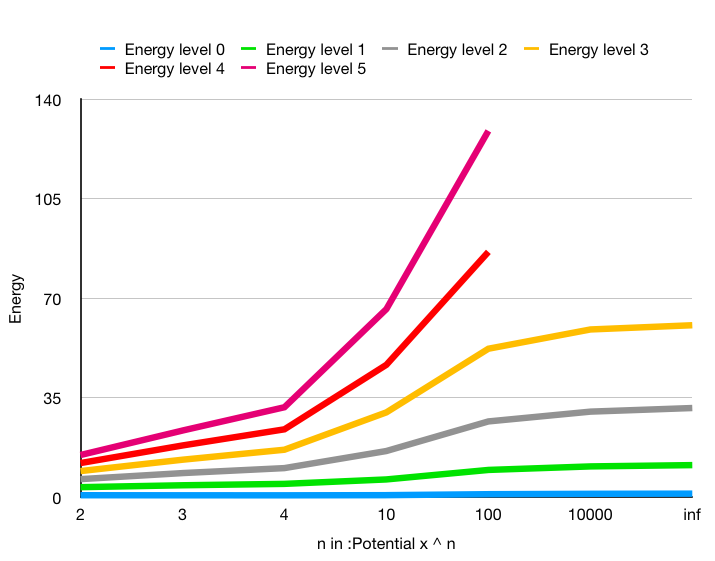

## Problem 2. Giordano & Nakanishi 2nd ed. Problem10.3

---


 



Use the shooting method to calculate the energy levels for the potential $V (x) = x^n$ for different values of $n$.

Demonstrate how the energy levels approximate an infinite square well for large $n$ . How do you ‘intuitively’ understand this result?

In [ ]:
def Potential(x,n):
    return np.power(x,n)

def wave_DE(x_range,y, params):
    psi, phi = y
    Energy = params[0]
    n = params[1]
    dPsi_dx = phi
    dPhi_dx = 2*(Potential(x_range,n)-Energy) * psi
    return [dPsi_dx, dPhi_dx]

def findEnergy(serchLevels,n):
    n = max(2,n)
    #serchLevels = 5
    serched = 0
    Energy = 0
    maxEnergy = 500
    deltaEnergy = 0.5
    rootsEnergy = np.zeros(int(serchLevels))
    #print(n)
    trys = 0
    while (serched < serchLevels):
    
        Energy = Energy + deltaEnergy
        L = np.power(Energy,1/n) + 5 if Energy > 10 else 5

        dx = 0.01
        x = np.arange(0, L+dx ,dx)
        try:
            trys = trys + 1
            root = scipy.optimize.bisect(Zeros_inWaveFunction,Energy,Energy+deltaEnergy,args=(n,x))
            #print('energy of level n = {0} is : {1}'.format(serched,root))
            rootsEnergy[serched] = root
            serched = serched + 1
        except:
            pass
        if (Energy>maxEnergy):
            raise Exception('Error many rys check; till now E = ',rootsEnergy)
            return rootsEnergy
    return rootsEnergy

def Zeros_inWaveFunction(Energy,n,x):
    if (parity == 'even'):
        psi_ini = 1
        dPsi_dx_ini = 0
    elif (parity == 'odd'):
        psi_ini = abs(x[1]-x[0])
        dPsi_dx_ini = -abs(x[1]-x[0]) #-dx
    else :
        raise Exception('parity not defined')

    z0 = [psi_ini, dPsi_dx_ini]
    params = [Energy,n]
    psi_sol = solve_ivp(fun=lambda t, z: wave_DE(t, z, params), t_span=[min(x),max(x)], y0=z0, t_eval=x)
    return psi_sol.y[0][-1]

def plotLevels(Energys,n):
    plt.figure(figsize=(10,10))
    plt.grid()

    for Energy in Energys:
        L = np.power(Energy,1/n)  + 2 
        dx = 0.001
        xi = np.arange(0, L+dx ,dx)

        if (parity == 'even'):
            psi_ini = 1
            dPsi_dx_ini = 0
        elif (parity == 'odd'):
            psi_ini = 0
            dPsi_dx_ini = -dx #-dx
        else :
            raise Exception('parity not defined ')        

        z0 = [psi_ini, dPsi_dx_ini]
        params = [Energy,n]

        psi_sol = solve_ivp(fun=lambda t, z: wave_DE(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
        
        psi = detectJump(psi_sol.y[0])

        plt.plot(-psi_sol.t,psi+Energy)
        plt.plot(psi_sol.t,psi+Energy,)

      #  plt.plot(-psi_sol.t,psi_sol.y[0]+Energy)
       # plt.plot(psi_sol.t,psi_sol.y[0]+Energy,)
    L = 1.5 * np.power(max(Energys),1/n )+5 #plot a bigger reqion for V
    x_range = np.linspace(-L,L, int(L/dx) );

    
    Label = g3_label(ll = 'Potential ' , lx = 'x' , ly= 'Potential' ,style = 'r-')
    g3.multiPlot(x_range,Potential(x_range,n),Label)
    plt.ylim(bottom = -1, top = max(Energys) + min(5,max(Energys)*1.5 ) )
    plt.xlim(left = -abs(max(Energys) + min(2,max(Energys)*1.5 )),  right = abs(max(Energys) + min(2,max(Energys)*1.5 ))   )

    vectorV = np.vectorize(Potential)
    plt.fill_between(x_range, vectorV(x_range,n), color='linen')


#To remove the divergence Or clean the psi .
def detectJump(psi):
    for i in range(len(psi)-1 ,int(len(psi)/3),-1):
        if ( abs(psi[i]) <  (0.1) ):
            psi[i:len(psi)] = 0
            return psi       
    return psi


n =  2
[0.70708117 3.53492067 6.36271148 9.19044192]


<function matplotlib.pyplot.show>

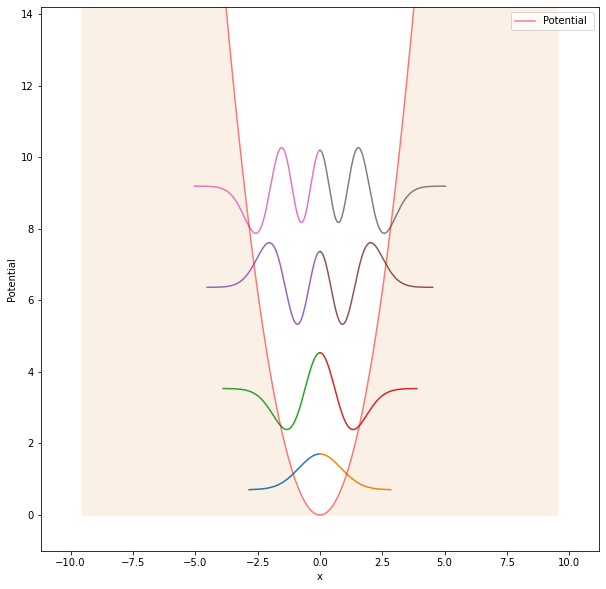

In [ ]:
# n is the power of x in potential : Potential = x^n .
# the computation works best for n < 6 and takes a long time for n > 10 
# Till not the code suport only even parity.
# levels are the first few levels for which the computation is done.

n= 2
levels = 4
parity = 'even'

Energys = np.zeros(int(levels))
Energys = findEnergy(levels,n)
print('n = ',n)
print(Energys)
plotLevels(Energys,n)
plt.grid()
plt.show

In [ ]:
parity = 'even'

def update_plot(potN,levels):
    n = max(2,potN)
    Energys = np.zeros(int(levels))
    Energys = findEnergy(levels,n)
    plotLevels(Energys,n)
    plt.show()



#making slider 
n_i = widgets.FloatSlider(min=2, max=10, value=2,step = 2 , description = 'x^n potential, n = : ')
levels_i = widgets.FloatSlider(min=1, max=6, value=2,step = 1 , description = 'Nth energy levle = : ')

#Starting the intractive session
widgets.interactive(update_plot, potN = n_i, levels =levels_i )

#please wait for it might take a minute 
# the code will run even after RuntimeWarning: overflow encountered in double_scalars 
#but the answer will hot be exact or right.

interactive(children=(FloatSlider(value=2.0, description='x^n potential, n = : ', max=10.0, min=2.0, step=2.0)…

## 3. Problem 3. Rubin Landau, 3rd ed. 9.2

In this problem, you will learn the matching algorithm, which is an alternative to the shooting method for solving bound states of the Schrodinger equation. This is also discussed in Giordano & Nakanishi’s book (Page 314 - 320).
The matching algorithm can be used to calculate the bound states of potentials that are not necessarily symmetric (e.g. the Lennard-Jones potential, describing the interaction between molecules). Of course it can also handle symmetric potentials. We will have a discussion on this in the Lab session, which will help you understand the idea behind the matching algorithm. But you must also read the textbook(s) before you attempt the solution.

Ans: discused in QM Lab 2.

#QM Lab - 2 : Schrodinger equation in 1D (Matching algorithms), Uncertainty products.
 

As discussed in Thursday’s lecture, the matching algorithm, is an alternative to the shooting method for solving bound states of the Schrodinger equation. This is also discussed in Giordano & Nakanishi’s book (Page 314 - 320) and outlined in Rubin Landau’s book, 3rd ed. Prob 9.2

The matching algorithm can be used to calculate the bound states of potentials that are not necessarily symmetric (e.g. the Lennard-Jones potential, describing the interaction between molecules). Of course, it can also handle symmetric potentials.

We will have a discussion on this in the Lab session, which will help you understand the idea behind the matching algorithm. But you must also read the textbook(s) before you attempt the solution.


For this lab, you will implement the Numerov solver. Please state clearly how you will start the solver. Remember that you will need the first two initial values $\psi 0$ and $\psi 1$ to proceed.

Use the matching method to obtain the wave functions for the first few states of the Lennard-Jones potential. Compare how the energy eigenvalues change with the quantum number (and compare it with the harmonic potential and infinite square well potential case). Use the form of the potential as given by Equation 10.12 in Giordano’s book, where the parameters and σ as given in Figure 10.8 of this book. The energy eigenvalues can be solved for using the secant method, as demonstrated on Thursday’s lab session (Oct 1, 2020).
Adjust the depth of the potential well so that you get a few bound states (at least 3).

Calculation of the uncertainty product ΔxΔp

Verify the uncertainty product ΔxΔp ≥ 21 for the first few eigenstates of the Lennard Jones potential.

You can calculate $ \delta x  =  \sqrt{ <x^2> - <x>^2 }$ where $x \equiv x/a$ is the dimensionless quantity, and $\left\langle x^{n}\right\rangle=\int_{-\infty}^{\infty} x^{n}|\psi(x)|^{2} d x$.
Similarly, argue that for stationary states with real wavefunctions,
$\Delta p=\sqrt{-\int_{0}^{1} \psi(x) \frac{d^{2}}{d x^{2}}} \psi(x) d x$

Once you solve the Schrodinger equation, you will get the wavefunction $\psi(x)$. To be able to calculate $\delta p$ you need a way to estimate its second derivative. This can be easily done with the central difference formula (lookup Wikipedia to jog your memory).

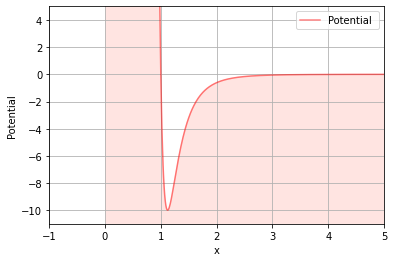

In [ ]:
def Potential(x):
    epsolin = 10
    sigma = 1
    return 4 * epsolin * ( np.power(sigma/x , 12) - np.power(sigma/x , 6) )

L = 10 #Meters.
dx = 0.01 # meters

x_range = np.arange(dx, L + dx , dx );
Label = g3_label(ll = 'Potential ' , lx = 'x' , ly= 'Potential' ,style = 'r-')
V = Potential(x_range)

g3.multiPlot(x_range,V,Label)

plt.fill_between(x_range, V , (min(V)-1)*np.ones(len(x_range)) , color='mistyrose' )

plt.ylim(bottom = min(V) - 1 , top = 5 )
plt.xlim(left = -1,  right = 5)
plt.grid()
plt.show()

In [ ]:
def Numerov(x, Energy,psi01 ):
    psi = np.zeros(len(x) + 1 )
    h = abs( x[1] - x[0] )

    psi[0] = psi01[0]
    psi[1] = psi01[1]

    def g(n):
        hbar = 1
        m = 1 
        return 2 * m / hbar**2 * (Energy - Potential(n) )  

    for i in range( 1, len(x)-1 ):
        kn = 1 - 5 / 12 * h**2 * g(x[i]) 
        kn_m1 = 1 + h**2 / 12 * g(x[i-1]) 
        kn_p1 = 1 + h**2 / 12 * g(x[i+1])

        psi[i+1] = ( 2 * psi[i] * kn - psi[i-1] * kn_m1 + 0 ) / kn_p1
    
    psi = np.delete(psi , 0)
    return psi

def max_inDx(x,xval,delx,array):
    if (len(x)!=len(array)):
        raise ValueError('length should be same of both array')
    arr = np.array(x)

    index1 = np.where( arr <= (xval + delx) )
    sort1 = arr[index1]
    sort1array = array[index1]

    index2 = np.where( sort1 >= (xval - delx) )
    sort2 = sort1[index2]
    sort2array = sort1array[index2]
    #print(max(sort2array))
    return max(sort2array)



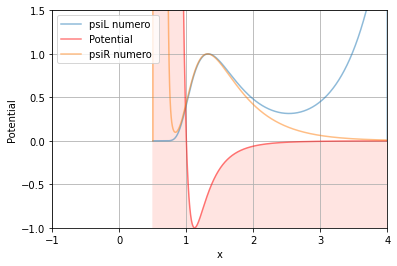

In [ ]:
L=4
dx = 0.0001
x_range = np.arange(0.5, L + dx, dx );

#Energy = -1.96
Energy = -1.96

psi01 = [0,0.001]

psiSol = Numerov(x_range, Energy,psi01 )
Label = g3_label(ll = 'psiL numero ' , lx = 'x' , ly= 'Potential' ,style = '-')
g3.multiPlot(x_range, psiSol/max_inDx(x_range , 1.5 , 0.5 ,psiSol ),Label)
#x_range = np.arange(0.5, 5+dx , dx );
V = Potential(x_range)
Label = g3_label(ll = 'Potential ' , lx = 'x' , ly= 'Potential' ,style = 'r-')
g3.multiPlot(x_range,V/10,Label)
plt.fill_between(x_range, V/10 , (min(V)-1)*np.ones(len(x_range)) , color='mistyrose' )


x_range = np.arange(5, 0.5 - dx, -dx );
psiSol = Numerov(x_range, Energy,psi01 )
Label = g3_label(ll = 'psiR numero ' , lx = 'x' , ly= 'Potential' ,style = '-')
g3.multiPlot(x_range,psiSol/max_inDx(x_range , 1.5 , 0.5 ,psiSol  ),Label)


plt.ylim(bottom =  -1 , top = 1.5 )
plt.xlim(left = -1,  right = 4)
plt.grid()
plt.show()

#the plot is scaled. 

-1.96


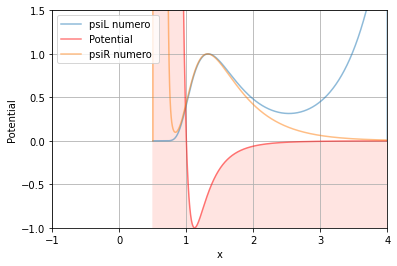

1.6


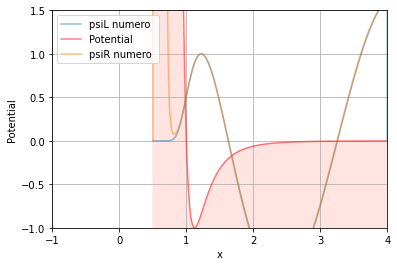

6.0999


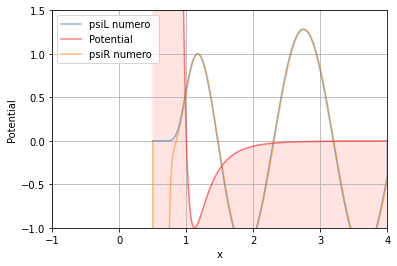

13


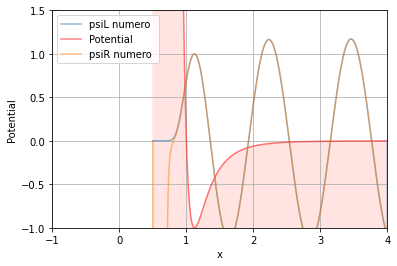

In [ ]:
Energys = [-1.96,1.6,6.0999,13]

#np.arange(4,8,0.1)
for Energy in Energys:
    print(Energy)

    L=4
    dx = 0.0001
    x_range = np.arange(0.5, L + dx, dx );

    psi01 = [0,0.001]

    psiSol = Numerov(x_range, Energy,psi01 )
    Label = g3_label(ll = 'psiL numero ' , lx = 'x' , ly= 'Potential' ,style = '-')
    g3.multiPlot(x_range, psiSol/max_inDx(x_range , 1.5 , 0.5 ,psiSol ),Label)

    #x_range = np.arange(0.5, 5+dx , dx );
    V = Potential(x_range)
    Label = g3_label(ll = 'Potential ' , lx = 'x' , ly= 'Potential' ,style = 'r-')
    g3.multiPlot(x_range,V/10,Label)
    plt.fill_between(x_range, V/10 , (min(V)-1)*np.ones(len(x_range)) , color='mistyrose' )


    x_range = np.arange(5, 0.5 - dx, -dx );
    psiSol = Numerov(x_range, Energy,psi01 )
    Label = g3_label(ll = 'psiR numero ' , lx = 'x' , ly= 'Potential' ,style = '-')
    g3.multiPlot(x_range,psiSol/max_inDx(x_range , 1.5 , 0.5 ,psiSol  ),Label)


    plt.ylim(bottom =  -1 , top = 1.5 )
    plt.xlim(left = -1,  right = 4)
    plt.grid()
    plt.show()
#the plot is scaled. 

# THE END